In [239]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [240]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [241]:
%matplotlib inline

In [242]:
from whatif import Model
from whatif import get_sim_results_df

In [243]:
fixed_cost = 5000
var_cost = 100
selling_price = 115
spf_constant = 4900
spf_linear = -35
spf_quadratic = 0.06
demand = spf_quadratic * (selling_price ** 2) + (spf_linear * selling_price) + spf_constant
total_var_cost = demand * var_cost
total_revenue = demand * selling_price
total_cost = fixed_cost + total_var_cost
profit = round(total_revenue - total_cost)

In [244]:
message = f"{'Demand':15}{demand:10.2f} \n" \
          f"{'Total Variable Cost':15}{total_var_cost:10.2f} \n" \
          f"{'Total Cost':15}{total_cost:10.2f} \n" \
          f"{'Total Revenue':15}{total_revenue:10.2f} \n" \
          f"{'Profit':15}{profit:10.2f}"

print(message)

Demand            1668.50 
Total Variable Cost 166850.00 
Total Cost      171850.00 
Total Revenue   191877.50 
Profit           20028.00


In [245]:
class SingleProductSPF(Model):
    """Base model

    This model relates profit of a company’s single product to the following inputs. 

    * there's a fixed cost of manufacturing this product each month
    * there's a variable cost per unit,
    * we have a known selling price,
    * demand is calculated based on historical data on selling price and monthly demand,
    * for each unsold item, we can get a partial refund of our unit cost,
    * function relating demand and selling price is D = 0.06S^2-35S+4900.

    Attributes
    ----------
    fixed_cost : float or array-like of float, optional
        fixed cost of manufacturing the product each month (default 5000.00)
    var_cost : float or array-like of float, optional
        variable cost per unit (default 100.00)
    selling_price : float or array-like of float, optional
        Selling price for the product (default 115.00)
    spf_constant : float or array-like of float, optional
        Constant value involved in the calculation of demand (default 4900.00)
    spf_linear : float or array-like of float, optional
        Coefficient of the linear degree of the selling price function (default -35)
    spf_quadratic : float or array-like of float, optional
        Coefficient of the quadratic degree of the selling price function (default 0.06)
    """
    def __init__(self, fixed_cost=5000, var_cost=100, selling_price=115,
                 spf_constant=4900, spf_linear=-35, spf_quadratic= 0.06 ):
        self.fixed_cost = fixed_cost
        self.var_cost = var_cost
        self.selling_price = selling_price
        self.spf_constant = spf_constant
        self.spf_linear = spf_linear
        self.spf_quadratic = spf_quadratic
        #self.demand = demand

    def demand(self):
        """Compute demand"""
        demand = self.spf_quadratic * (self.selling_price ** 2) \
        + (self.spf_linear * self.selling_price) + self.spf_constant
        return demand
    
    def total_var_cost(self):
        """Compute total variable cost based on demand and variable cost per unit"""
        return self.demand() * self.var_cost

    def total_revenue(self):
        """Compute total sales revenue based on demand and selling price"""
        return self.demand() * self.selling_price

    def total_cost(self):
        """Compute total cost based on fixed cost and total variable cost"""
        return self.fixed_cost + self.total_var_cost()

    def profit(self):
        """Compute profit based on revenue and cost"""
        profit = self.total_revenue() - self.total_cost()
        return profit


In [246]:
import sys
print('\n'.join(sys.path))

B:\Sandhya\Oakland\Summer_2022\AAP\HW2\basicbreakevenanalysis\notebooks
C:\Users\mbala\anaconda3\envs\aap\python37.zip
C:\Users\mbala\anaconda3\envs\aap\DLLs
C:\Users\mbala\anaconda3\envs\aap\lib
C:\Users\mbala\anaconda3\envs\aap

C:\Users\mbala\anaconda3\envs\aap\lib\site-packages
C:\Users\mbala\anaconda3\envs\aap\lib\site-packages\win32
C:\Users\mbala\anaconda3\envs\aap\lib\site-packages\win32\lib
C:\Users\mbala\anaconda3\envs\aap\lib\site-packages\Pythonwin
C:\Users\mbala\anaconda3\envs\aap\lib\site-packages\IPython\extensions
C:\Users\mbala\.ipython


In [247]:
model = SingleProductSPF()
print(model)
print(model.profit())

{'fixed_cost': 5000, 'var_cost': 100, 'selling_price': 115, 'spf_constant': 4900, 'spf_linear': -35, 'spf_quadratic': 0.06}
20027.5


In [248]:
#from sklearn.model_selection._search import ParameterGrid

In [249]:
# Specify input ranges for scenarios (dictionary)
# 1-way table

dt_param_ranges_1 = {'selling_price': np.arange(80, 141, 10)}
print(dt_param_ranges_1)

# Specify desired outputs (list)
outputs = ['profit', 'demand']

# Use data_table function to create 1-way data table
m1_dt1_df = model.data_table(dt_param_ranges_1, outputs)
m1_dt1_df

{'selling_price': array([ 80,  90, 100, 110, 120, 130, 140])}


,selling_price,profit,demand
0,80,-54680.0,2484.0
1,90,-27360.0,2236.0
2,100,-5000.0,2000.0
3,110,12760.0,1776.0
4,120,26280.0,1564.0
5,130,35920.0,1364.0
6,140,42040.0,1176.0


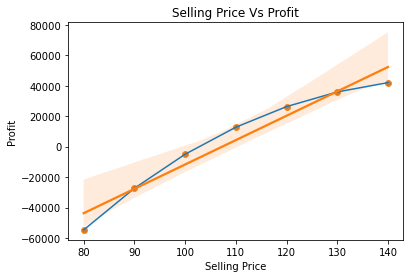

In [250]:
#Scatter plot of selling price and profit
sns.scatterplot(x='selling_price', y='profit', data = m1_dt1_df)
sns.lineplot(x='selling_price', y='profit', data = m1_dt1_df)
#Adding trendline to the plot
ax = sns.regplot(x="selling_price", y="profit", data=m1_dt1_df)
plt.title('Selling Price Vs Profit');
plt.xlabel('Selling Price')
plt.ylabel('Profit');

> From the above scatter plot, the relationship between selling price and profit seems nonlinear.
The quadratic equation of degree two fits well.

#### 1c – Break Even

In [251]:
# Use goal_seek to compute break even selling price
break_even_sp = model.goal_seek('profit', 0, 'selling_price', 80, 140, 1000)

In [252]:
print(break_even_sp)

102.57578606424767


In [253]:
message_1 = f"{'Break even selling price':15}{break_even_sp:10.2f}"

In [254]:
print(message_1)

Break even selling price    102.58


#### 1d – 2-way Data Table)

sensitivity of profit AND total cost to different combinations of selling price and the variable production cost
price range from `$80 to $140 in steps of $10

let the variable production cost vary from $85 to $110 in steps of $5

In [255]:
# 2-way table
dt_param_ranges_2 = {'selling_price': np.arange(80, 141, 10),
                     'var_cost': np.arange(85, 111, 5)}

# Specify desired outputs (list)
outputs = ['profit', 'total_cost']

# Use data_table function to create 1-way data table
m2_dt2_df = model.data_table(dt_param_ranges_2, outputs)
m2_dt2_df

,selling_price,var_cost,profit,total_cost
0,80,85,-17420.0,216140.0
1,80,90,-29840.0,228560.0
2,80,95,-42260.0,240980.0
3,80,100,-54680.0,253400.0
4,80,105,-67100.0,265820.0
5,80,110,-79520.0,278240.0
6,90,85,6180.0,195060.0
7,90,90,-5000.0,206240.0
8,90,95,-16180.0,217420.0
9,90,100,-27360.0,228600.0


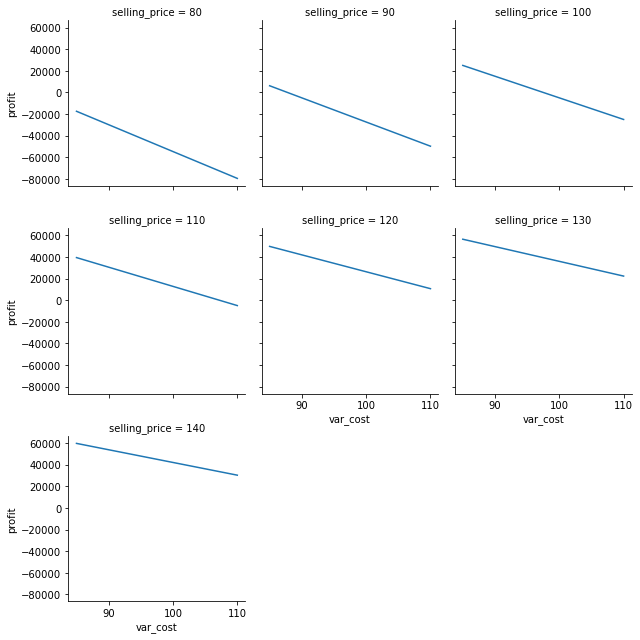

In [256]:
profit_dt_g = sns.FacetGrid(m2_dt2_df, col="selling_price", sharey=True, col_wrap=3)
profit_dt_g = profit_dt_g.map(plt.plot, "var_cost", "profit")

> From the above plot we can observe that the maximum profit is achieved when selling price is 140 and variable cost is 85.

#### 1e – Digging deeper

•	Redo the Goal Seek but instead of using $80-$140 as your search range, use $80-$250. What happens? Why do you think this happens?

•	Redo your 1-way data table and associated selling price vs profit plot but use $80-$250 as your input range. Now, why do you think that your Goal Seek failed?


In [257]:
# Use goal_seek to compute break even selling price for range 80 to 250
break_even_sp_1 = model.goal_seek('profit', 0, 'selling_price', 80, 250, 1000)

In [258]:
print(break_even_sp_1)

None


> When the range is changed to 80 - 250. the goal seek failed to converge and the bisection method could not find the root value


In [259]:
# Specify input ranges for scenarios (dictionary)
# 1-way table

dt_param_ranges_3 = {'selling_price': np.arange(80, 251, 10)}
print(dt_param_ranges_3)

# Specify desired outputs (list)
outputs = ['profit', 'demand']

# Use data_table function to create 1-way data table
m3_dt1_df = model.data_table(dt_param_ranges_3, outputs)
m3_dt1_df

{'selling_price': array([ 80,  90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200,
       210, 220, 230, 240, 250])}


,selling_price,profit,demand
0,80,-54680.0,2484.0
1,90,-27360.0,2236.0
2,100,-5000.0,2000.0
3,110,12760.0,1776.0
4,120,26280.0,1564.0
5,130,35920.0,1364.0
6,140,42040.0,1176.0
7,150,45000.0,1000.0
8,160,45160.0,836.0
9,170,42880.0,684.0


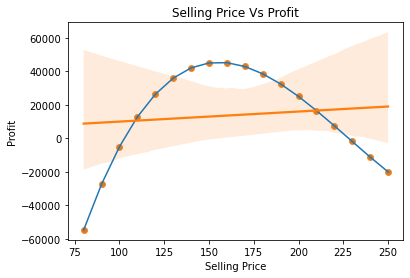

In [260]:
#Scatter plot of selling price and profit
sns.scatterplot(x='selling_price', y='profit', data = m3_dt1_df)
sns.lineplot(x='selling_price', y='profit', data = m3_dt1_df)
#Adding trendline to the plot
ax = sns.regplot(x="selling_price", y="profit", data=m3_dt1_df)
plt.title('Selling Price Vs Profit');
plt.xlabel('Selling Price')
plt.ylabel('Profit');

> From the above plot and the 1-way data table, it is clear that the profit value does not converge to zero. Hence, the goal seek failed.

#### 1f – Simulation

In [261]:
from numpy.random import default_rng
rg = default_rng(4470)

In [262]:
random_input = {'var_cost': rg.uniform(80, 120, 100)}
sim_output = ['profit']

In [263]:
model3_sim_results = model.simulate(random_input, sim_output)

In [265]:
model3_sim_results_df = get_sim_results_df(model3_sim_results)

In [266]:
model3_sim_results_df

,profit,scenario_num
0,22793.336118,0
1,43371.982227,0
2,39257.449247,0
3,30530.501317,0
4,-8959.808939,0
...,...,...
95,36859.993613,0
96,51279.331055,0
97,30365.628918,0
98,-4502.041094,0


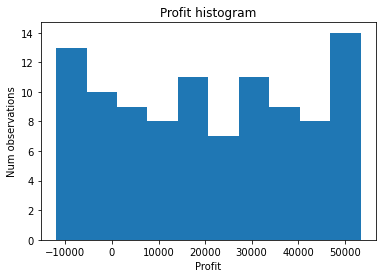

In [268]:
plt.title("Profit histogram")
plt.xlabel("Profit")
plt.ylabel("Num observations")
plt.hist('profit',data = model3_sim_results_df, density=False);

In [270]:
profit_sim = model3_sim_results_df['profit']

In [271]:
from scipy import stats

In [272]:
print(stats.percentileofscore(profit_sim, 0) / 100.0)

0.22


In [274]:
print(f'Probability that profit is negative based on the simulation is ,{stats.percentileofscore(profit_sim, 0) / 100.0: .2%}')

probability that profit is negative based on the simulation is , 22.00%
